# _The Sparks Foundation_
## Data Science and Business Analytics Internship
### Task 2: Iris Dataset Clustering Using Unsupervised Learnings
In this task, we will predict the optimum number of cluster in the iris datasets

### 1) Importing the Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### 2) Importing the dataset

In [20]:
Iris = pd.read_csv('Iris.csv')

In [21]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# Check the statistical Description of Datasets
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
# Check the information of the attributes
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Dividing the attributes into dependent and dependent features

In [23]:
x = Iris.iloc[:,[1,4]].values

### 3) Using the elbow method to find the optmimal numbers of clusters

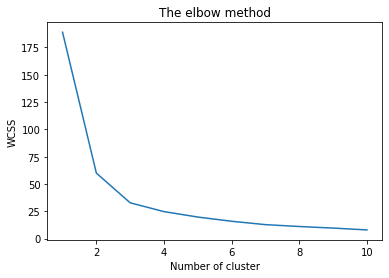

In [24]:
from sklearn.cluster import KMeans
wcss = []  #wcss is the sq. of distance between each point and the centroid in the cluster
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10, random_state=42) #we use kmeans++ to avois the random initialization trap
    kmeans.fit(x) #fitting the model
    wcss.append(kmeans.inertia_)  #kmeans_inertia_ return the WCSS value for an initialization cluster
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

### 4) Training the KMeans model on the datasets

In [25]:
kmeans = KMeans(n_clusters=3, init="k-means++",n_init=10, random_state= 42)
y_kmeans = kmeans.fit_predict(x)

In [26]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 1 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 2 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]


### 5) Visualizing the clusters

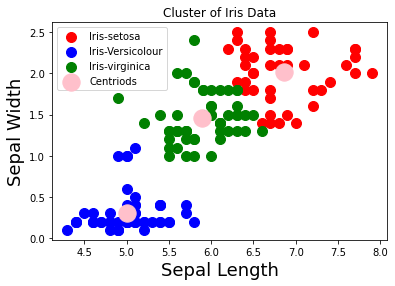

In [27]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label= 'Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label= 'Iris-Versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label= 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='pink',label='Centriods')
plt.title('Cluster of Iris Data')
plt.xlabel('Sepal Length',fontsize=18)
plt.ylabel('Sepal Width',fontsize=18)
plt.legend()
plt.show()


## _The above plot gives the centroid (in pink) of each type of Iris class_